中文nlpTools推荐：ltp(性能好)和jiagu(功能多),Synonyms(相似度常用)

# 字符串数量统计

In [6]:
# 下面的代码首先生成包含1000个随机字符的字符串
# 然后统计每个字符的出现次数
import string
import random
x = string.ascii_letters + string.digits + string.punctuation
# print('\n可使用的字符集:\n', len(x))   
y = [random.choice(x) for i in range(1000)]
# print(y)
z = ''.join(y)
d = dict()
# 遍历生成并且统计数量
for ch in z:
	d[ch] = d.get(ch, 0) + 1  #千万不要使用d[ch] =d[ch] + 1，否则字典没有ch的key，出错
# print('\n产生字符串为:\n',z,sep='')
print('\n统计结果为:\n',d,sep='')


统计结果为:
{'p': 12, 'n': 13, '<': 8, '*': 10, '?': 12, '@': 10, ';': 10, 'f': 10, 'V': 11, '%': 13, '$': 13, 'm': 12, 'A': 9, 'T': 6, 'x': 7, '!': 7, 'O': 4, 'y': 14, '4': 12, '>': 12, 'l': 7, 'P': 15, 'E': 9, '-': 4, 'j': 9, '\\': 12, 'S': 10, '3': 9, '&': 11, 'z': 11, 's': 15, 'U': 6, '5': 17, '6': 10, '"': 15, 'u': 15, ')': 7, ']': 12, 'b': 5, '|': 8, '9': 13, 'J': 14, 'F': 16, 'q': 12, '{': 8, 'Y': 10, 'C': 13, 'X': 7, ':': 15, '.': 12, 'k': 16, 'o': 5, 'c': 15, '_': 10, 'B': 16, 'M': 6, 'w': 23, 'R': 16, '1': 17, 'd': 15, '0': 12, 'D': 6, 'W': 13, '=': 13, 'a': 9, '~': 14, '7': 8, 'K': 10, 'e': 8, '8': 9, 'L': 5, '[': 9, 'i': 13, 'N': 10, 'r': 12, ',': 7, "'": 7, '}': 9, '(': 9, 'h': 13, '`': 13, 'v': 12, 'Q': 7, 'g': 12, 't': 15, 'G': 9, '/': 11, '^': 9, '2': 9, '+': 6, 'Z': 3, '#': 6, 'I': 9, 'H': 12}


# 句子相似度计算

In [10]:
# 计算句子相似度
import jieba

from difflib import SequenceMatcher#导入库
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()#引用ratio方法，返回序列相似性的度量
print(similarity((6,6,6,6,6,6,6), (6,6,6,6,6,6,7)))

def Jaccrad(model, reference):  # terms_reference为源句子，terms_model为候选句子
    terms_reference = jieba.cut(reference)  # 默认精准模式
    terms_model = jieba.cut(model)
    grams_reference = set(terms_reference)  # 去重；如果不需要就改为list
    grams_model = set(terms_model)
    temp = 0
    for i in grams_reference:
        if i in grams_model:
            temp = temp + 1
    fenmu = len(grams_model) + len(grams_reference) - temp  # 并集
    jaccard_coefficient = float(temp / fenmu)  # 交集
    return jaccard_coefficient


a = "飞控系统主要组成以及交联设备:飞行传感器系统(子系统)的说明是什么？"
b = "飞行传感器系统(子系统)"
jaccard_coefficient = Jaccrad(a, b)
print(jaccard_coefficient)

0.8571428571428571
0.3157894736842105


In [ ]:
# 在句子中找到p然后分割后计算相似度来找s
import pymongo
client=pymongo.MongoClient('mongodb://localhost:27017')
db = client.cndbpedia03
collection = db.triples
import bson
import jieba

def Jaccrad(model, reference):  # terms_reference为源句子，terms_model为候选句子,计算句子相似度
    terms_reference = jieba.cut(reference)  # 默认精准模式
    terms_model = jieba.cut(model)
    grams_reference = set(terms_reference)  # 去重；如果不需要就改为list
    grams_model = set(terms_model)
    temp = 0
    for i in grams_reference:
        if i in grams_model:
            temp = temp + 1
    fenmu = len(grams_model) + len(grams_reference) - temp  # 并集
    jaccard_coefficient = float(temp / fenmu)  # 交集
    return jaccard_coefficient


a = "飞控系统主要组成以及交联设备:飞行传感器系统(子系统)的说明是什么？"

str_input = "飞控系统的说明是什么"
# jaccard_coefficient = Jaccrad(str_input, b)

results = collection.find({})
for result in results:
    if result['p'] in str_input:
        str_split = str_input.split(result['p'])
        str_p = result['p']
        break
str_s = str_split[0]
print(str_s)
print(str_p)

# jaccard_coefficient = Jaccrad(str_s, b)
results = collection.find({"p":str_p})
for result in results:
    jacc_score = Jaccrad(str_s,result['s'])
    # print(jacc_score)
    if jacc_score > 0.1:
        print(result['s'],result['p'],result['o'])
print("--------------------------------------------")
# print(collection.find({"p": "用途"}).count()) 

# jaccard_coefficient = Jaccrad(a, b)
# print(jaccard_coefficient) //一个系数

# ⭐哈工大LTP-亲测中文处理简单好用

In [15]:
#pip install ltp
from ltp import LTP
ltp = LTP()

In [21]:
from ltp import LTP

ltp = LTP()  # 默认加载 Small 模型
seg, hidden = ltp.seg(["我在复旦大学马路边看见了计算机学院肖仰华老师。"])
print('seg: ',seg)
# print(hidden)
pos = ltp.pos(hidden)
print('pos: ',pos)
ner = ltp.ner(hidden)
print('ner: ',ner)
srl = ltp.srl(hidden)
print('srl: ',srl)
dep = ltp.dep(hidden)
print('dep',dep)
sdp = ltp.sdp(hidden)
print('sdp',sdp)

seg:  [['我', '在', '复旦', '大学', '马路边', '看见', '了', '计算机', '学院', '肖仰华', '老师', '。']]
pos:  [['r', 'p', 'nz', 'n', 'n', 'v', 'u', 'n', 'n', 'nh', 'n', 'wp']]
ner:  [[('Ni', 2, 3), ('Ni', 7, 8), ('Nh', 9, 9)]]
srl:  [[[], [], [], [], [], [('A0', 0, 0), ('ARGM-LOC', 1, 4), ('A1', 7, 10)], [], [], [], [], [], []]]
dep [[(1, 6, 'SBV'), (2, 6, 'ADV'), (3, 4, 'ATT'), (4, 5, 'ATT'), (5, 2, 'POB'), (6, 0, 'HED'), (7, 6, 'RAD'), (8, 9, 'ATT'), (9, 11, 'ATT'), (10, 11, 'ATT'), (11, 6, 'VOB'), (12, 6, 'WP')]]
sdp [[(1, 6, 'AGT'), (2, 5, 'mRELA'), (3, 4, 'FEAT'), (4, 5, 'FEAT'), (5, 6, 'LOC'), (6, 0, 'Root'), (7, 6, 'mDEPD'), (8, 9, 'FEAT'), (9, 11, 'FEAT'), (10, 11, 'FEAT'), (11, 6, 'DATV'), (12, 6, 'mPUNC')]]


In [17]:
#分句
sents = ltp.sent_split(["他叫汤姆去拿外衣。汤姆生病了。他去了医院。"])
print(sents)
# user_dict.txt 是词典文件， max_window是最大前向分词窗口,用户自定义词典
ltp.init_dict(path="user_dict.txt", max_window=4)
# 也可以在代码中添加自定义的词语
ltp.add_words(words=["负重前行", "长江大桥"], max_window=4)
#分词
segment,_= ltp.seg(["他叫汤姆去拿外衣。"])
segment, hidden = ltp.seg(["他/叫/汤姆/去/拿/外衣/。".split('/')], is_preseged=True)
# print(hidden)
#词性标注
pos = ltp.pos(hidden)
print(pos)
# NER
seg, hidden = ltp.seg(["我在复旦大学马路边看见了计算机学院肖仰华老师。"])
print(seg)
ner = ltp.ner(hidden)
print(ner)
# [['他', '叫', '汤姆', '去', '拿', '外衣', '。']]
# [[('Nh', 2, 2)]]
tag, start, end = ner[0][0]
print(tag,":", "".join(seg[0][start:end + 1]))
# Nh : 汤姆
# 语义角色标注
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
srl1 = ltp.srl(hidden)
print(srl1)
srl2 = ltp.srl(hidden, keep_empty=False)
print(srl2)
# 依存句法分析:在依存句法当中，虚节点ROOT占据了0位置，因此节点的下标从1开始。
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
dep = ltp.dep(hidden)
print(dep)
# 语义依存分析(树)
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
sdp = ltp.sdp(hidden)
print(sdp)

['他叫汤姆去拿外衣。', '汤姆生病了。', '他去了医院。']
[['r', 'v', 'nh', 'v', 'v', 'n', 'wp']]
[['我', '在', '复旦', '大学', '马路边', '看见', '了', '计算机', '学院', '肖仰华', '老师', '。']]
[[('Ni', 2, 3), ('Ni', 7, 8), ('Nh', 9, 9)]]
Ni : 复旦大学
[[[], [('A0', 0, 0), ('A1', 2, 2), ('A2', 3, 5)], [], [], [('A0', 2, 2), ('A1', 5, 5)], [], []]]
[[(1, [('A0', 0, 0), ('A1', 2, 2), ('A2', 3, 5)]), (4, [('A0', 2, 2), ('A1', 5, 5)])]]
[[(1, 2, 'SBV'), (2, 0, 'HED'), (3, 2, 'DBL'), (4, 5, 'ADV'), (5, 2, 'VOB'), (6, 5, 'VOB'), (7, 2, 'WP')]]
[[(1, 2, 'AGT'), (2, 0, 'Root'), (3, 2, 'DATV'), (3, 4, 'AGT'), (3, 5, 'AGT'), (4, 2, 'eSUCC'), (5, 2, 'eSUCC'), (5, 4, 'eSUCC'), (6, 5, 'PAT'), (7, 2, 'mPUNC')]]


In [23]:
# NER
from ltp import LTP
ltp = LTP()
seg, hidden = ltp.seg(["飞控系统主要组成以及交联设备:飞行传感系统（子系统）"])
print(seg)
ner = ltp.ner(hidden)
print(ner)

[['飞控', '系统', '主要', '组成', '以及', '交联', '设备', ':', '飞行', '传感', '系统', '（', '子系统', '）']]
[[]]


# 甲言-古汉语信息处理

In [38]:
from jiayan import PMIEntropyLexiconConstructor

constructor = PMIEntropyLexiconConstructor()
lexicon = constructor.construct_lexicon('庄子.txt')
constructor.save(lexicon, '庄子词库.csv')

FileNotFoundError: [Errno 2] No such file or directory: '庄子.txt'

# ⭐jiagu自然语言处理工具 - 方便快捷 

Jiagu使用大规模语料训练而成。将提供中文分词、词性标注、命名实体识别、情感分析、知识图谱关系抽取、关键词抽取、文本摘要、新词发现、情感分析、文本聚类等常用自然语言处理功能。参考了各大工具优缺点制作，将Jiagu回馈给大家。

1. 快速上手：分词、词性标注、命名实体识别

In [2]:
import jiagu
#jiagu.init() # 可手动初始化，也可以动态初始化

text = '飞控系统主要组成以及交联设备:飞行传感系统（子系统）'

words = jiagu.seg(text) # 分词
print(words)

pos = jiagu.pos(words) # 词性标注
print(pos)

ner = jiagu.ner(words) # 命名实体识别
print(ner)

['飞控', '系统', '主要', '组成', '以及', '交', '联', '设备', ':', '飞行', '传感', '系统', '（', '子系统', '）']
['n', 'n', 'a', 'v', 'c', 'v', 'v', 'n', 'w', 'v', 'n', 'n', 'w', 'n', 'w']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


2. 中文分词

In [3]:
import jiagu

text = '汉服和服装、维基图谱'

words = jiagu.seg(text)
print(words)

# jiagu.load_userdict('dict/user.dict') # 加载自定义字典，支持字典路径、字典列表形式。
jiagu.load_userdict(['汉服和服装'])

words = jiagu.seg(text) # 自定义分词，字典分词模式有效
print(words)

['汉服', '和', '服装', '、', '维基', '图谱']
['汉服和服装', '、', '维基', '图谱']


3. 知识图谱关系抽取

仅用于测试用，可以pip3 install jiagu==0.1.8，只能使用百科的描述进行测试。效果更佳的后期将会开放api。

In [14]:
import jiagu

# 吻别是由张学友演唱的一首歌曲。
# 《盗墓笔记》是2014年欢瑞世纪影视传媒股份有限公司出品的一部网络季播剧，改编自南派三叔所著的同名小说，由郑保瑞和罗永昌联合导演，李易峰、杨洋、唐嫣、刘天佐、张智尧、魏巍等主演。

text = '姚明1980年9月12日出生于上海市徐汇区，祖籍江苏省苏州市吴江区震泽镇，前中国职业篮球运动员，司职中锋，现任中职联公司董事长兼总经理。'
knowledge = jiagu.knowledge(text)
print(knowledge)
type(knowledge)

[['姚明', '出生日期', '1980年9月12日'], ['姚明', '出生地', '上海市徐汇区'], ['姚明', '祖籍', '江苏省苏州市吴江区震泽镇']]


list

4. 关键词提取

In [5]:
import jiagu

text = '''
该研究主持者之一、波士顿大学地球与环境科学系博士陈池（音）表示，“尽管中国和印度国土面积仅占全球陆地的9%，但两国为这一绿化过程贡献超过三分之一。考虑到人口过多的国家一般存在对土地过度利用的问题，这个发现令人吃惊。”
NASA埃姆斯研究中心的科学家拉玛·内曼尼（Rama Nemani）说，“这一长期数据能让我们深入分析地表绿化背后的影响因素。我们一开始以为，植被增加是由于更多二氧化碳排放，导致气候更加温暖、潮湿，适宜生长。”
“MODIS的数据让我们能在非常小的尺度上理解这一现象，我们发现人类活动也作出了贡献。”
NASA文章介绍，在中国为全球绿化进程做出的贡献中，有42%来源于植树造林工程，对于减少土壤侵蚀、空气污染与气候变化发挥了作用。
据观察者网过往报道，2017年我国全国共完成造林736.2万公顷、森林抚育830.2万公顷。其中，天然林资源保护工程完成造林26万公顷，退耕还林工程完成造林91.2万公顷。京津风沙源治理工程完成造林18.5万公顷。三北及长江流域等重点防护林体系工程完成造林99.1万公顷。完成国家储备林建设任务68万公顷。
'''				

keywords = jiagu.keywords(text, 5) # 关键词
print(keywords)

['.', '工程', '万', '造林', '绿化']


5. 文本摘要

In [8]:
import jiagu

# fin = open('input.txt', 'r')
# text = fin.read()
# fin.close()

text = '''该研究主持者之一、波士顿大学地球与环境科学系博士陈池（音）表示，“尽管中国和印度国土面积仅占全球陆地的9%，但两国为这一绿化过程贡献超过三分之一。考虑到人口过多的国家一般存在对土地过度利用的问题，这个发现令人吃惊。”
NASA埃姆斯研究中心的科学家拉玛·内曼尼（Rama Nemani）说，“这一长期数据能让我们深入分析地表绿化背后的影响因素。我们一开始以为，植被增加是由于更多二氧化碳排放，导致气候更加温暖、潮湿，适宜生长。”
“MODIS的数据让我们能在非常小的尺度上理解这一现象，我们发现人类活动也作出了贡献。”
NASA文章介绍，在中国为全球绿化进程做出的贡献中，有42%来源于植树造林工程，对于减少土壤侵蚀、空气污染与气候变化发挥了作用。
据观察者网过往报道，2017年我国全国共完成造林736.2万公顷、森林抚育830.2万公顷。其中，天然林资源保护工程完成造林26万公顷，退耕还林工程完成造林91.2万公顷。京津风沙源治理工程完成造林18.5万公顷。三北及长江流域等重点防护林体系工程完成造林99.1万公顷。完成国家储备林建设任务68万公顷。'''

summarize = jiagu.summarize(text, 1) # 摘要
print(summarize)

['”NASA文章介绍，在中国为全球绿化进程做出的贡献中，有42%来源于植树造林工程，对于减少土壤侵蚀、空气污染与气候变化发挥了作用。']


6. 新词发现

In [10]:
import jiagu

jiagu.findword('input.txt', 'output.txt')
# 根据文本，利用信息熵做新词发现。

7. 情感分析

In [11]:
import jiagu

text = '很讨厌还是个懒鬼'
sentiment = jiagu.sentiment(text)
print(sentiment)

('negative', 0.9957030885091285)


8. 文本聚类

In [13]:
import jiagu

docs = [
        "百度深度学习中文情感分析工具Senta试用及在线测试",
        "情感分析是自然语言处理里面一个热门话题",
        "AI Challenger 2018 文本挖掘类竞赛相关解决方案及代码汇总",
        "深度学习实践：从零开始做电影评论文本情感分析",
        "BERT相关论文、文章和代码资源汇总",
        "将不同长度的句子用BERT预训练模型编码，映射到一个固定长度的向量上",
        "自然语言处理工具包spaCy介绍",
        "现在可以快速测试一下spaCy的相关功能，我们以英文数据为例，spaCy目前主要支持英文和德文"
    ]
cluster = jiagu.text_cluster(docs)
print(cluster)

{0: ['百度深度学习中文情感分析工具Senta试用及在线测试', '深度学习实践：从零开始做电影评论文本情感分析', '将不同长度的句子用BERT预训练模型编码，映射到一个固定长度的向量上', '现在可以快速测试一下spaCy的相关功能，我们以英文数据为例，spaCy目前主要支持英文和德文'], 1: ['自然语言处理工具包spaCy介绍', '情感分析是自然语言处理里面一个热门话题'], 2: ['AI Challenger 2018 文本挖掘类竞赛相关解决方案及代码汇总', 'BERT相关论文、文章和代码资源汇总']}


词性标注说明：

n　　　普通名词
nt　 　时间名词
nd　 　方位名词
nl　 　处所名词
nh　 　人名
nhf　　姓
nhs　　名
ns　 　地名
nn 　　族名
ni 　　机构名
nz 　　其他专名
v　　 动词
vd　　趋向动词
vl　　联系动词
vu　　能愿动词
a　 　形容词
f　 　区别词
m　 　数词　　
q　 　量词
d　 　副词
r　 　代词
p　　 介词
c　 　连词
u　　 助词
e　 　叹词
o　 　拟声词
i　 　习用语
j　　 缩略语
h　　 前接成分
k　　 后接成分
g　 　语素字
x　 　非语素字
w　 　标点符号
ws　　非汉字字符串
wu　　其他未知的符号

命名实体说明（采用BIO标记方式）:

B-PER、I-PER   人名

B-LOC、I-LOC   地名

B-ORG、I-ORG   机构名

# ⭐Synonyms近义词和词向量获取

In [7]:
import synonyms

smart_open library not found; falling back to local-filesystem-only
[jieba] default dict file path ..\data\vocab.txt
[jieba] default dict file path ..\data\vocab.txt
[jieba] load default dict ..\data\vocab.txt ...
[jieba] load default dict ..\data\vocab.txt ...
>> Synonyms load wordseg dict [D:\Anaconda\envs\Deep\lib\site-packages\synonyms\data\vocab.txt] ... 
>> Synonyms on loading stopwords [D:\Anaconda\envs\Deep\lib\site-packages\synonyms\data\stopwords.txt] ...
[Synonyms] on loading vectors [D:\Anaconda\envs\Deep\lib\site-packages\synonyms\data\words.vector.gz] ...


In [8]:
print(synonyms.nearby("飞控系统"))

飞控系统:  ([], [])


In [2]:
import synonyms
print("人脸: ", synonyms.nearby("人脸"))
print("识别: ", synonyms.nearby("识别"))
print("NOT_EXIST: ", synonyms.nearby("NOT_EXIST"))

synonyms.nearby(人脸, 10) = (
    ["图片", "图像", "通过观察", "数字图像", "几何图形", "脸部", "图象", "放大镜", "面孔", "Mii"],
    [0.597284, 0.580373, 0.568486, 0.535674, 0.531835, 0.530
095, 0.525344, 0.524009, 0.523101, 0.516046])
#
两个句子的相似度比较

    sen1 = "发生历史性变革"
    sen2 = "发生历史性变革"
    r = synonyms.compare(sen1, sen2, seg=True)
    
# 以友好的方式打印近义词，方便调试，display(WORD [, SIZE])调用了 synonyms#nearby 方法。

synonyms.display("飞机")
# '飞机'近义词：
#   1. 飞机:1.0
#   2. 直升机:0.8423391
#   3. 客机:0.8393003
#   4. 滑翔机:0.7872388
#   5. 军用飞机:0.7832081
#   6. 水上飞机:0.77857226
#   7. 运输机:0.7724742
#   8. 航机:0.7664748
#   9. 航空器:0.76592904
#   10. 民航机:0.74209654


#获得一个词语的向量，该向量为 numpy 的 array，当该词语是未登录词时，抛出 KeyError 异常。
synonyms.v("飞机")
array([-2.412167  ,  2.2628384 , -7.0214124 ,  3.9381874 ,  0.8219283 ,
       -3.2809453 ,  3.8747153 , -5.217062  , -2.2786229 , -1.2572327 ],
      dtype=float32)
# 中文分词

synonyms.seg("中文近义词工具包")
# 分词结果，由两个 list 组成的元组，分别是单词和对应的词性。

(['中文', '近义词', '工具包'], ['nz', 'n', 'n'])

SyntaxError: invalid token (<ipython-input-2-62fd3ea4ada2>, line 9)

# fasttext

In [2]:
# coidng:utf-8
import fasttext
 
 
# 模型的训练
def train():
    model = fasttext.train_supervised("train.txt", lr=0.1, dim=100, epoch=500, word_ngrams=4, loss='softmax')
    model.save_model("model_file.bin")
 
 
# 模型的测试
def test_1():
    classifier = fasttext.load_model("model_file.bin")
    # 测试模型
    result = classifier.test("test.txt")
    print("准确率:", result)
    f1 = open('prediction.txt', 'w', encoding='utf-8')
    with open('test.txt', encoding='utf-8') as fp:
        for line in fp.readlines():
            line = line.strip()
            if line == '':
                continue
            f1.write(line + '\t#####\t' + classifier.predict([line])[0][0][0] + '\n')
    f1.close()
 
 
if __name__ == '__main__':
    train()
    test_1()

准确率: (0, nan, nan)


In [3]:
import fasttext
trainDataFile = 'train.txt'
 
classifier = fasttext.train_supervised(
    input = trainDataFile,
    label_prefix = '__label__',
    dim = 256,
    epoch = 50,
    lr = 1,
    lr_update_rate = 50,
    min_count = 3,
    loss = 'softmax',
    word_ngrams = 2,
    bucket = 1000000)
classifier.save_model("Model.bin")

In [5]:
testDataFile = 'test.txt'
 
classifier = fasttext.load_model('Model.bin') 
 
result = classifier.test(testDataFile)
print('测试集上数据量', result[0])
print('测试集上准确率', result[1])
print('测试集上召回率', result[2])

测试集上数据量 0
测试集上准确率 nan
测试集上召回率 nan


# lightNLP

是要train的，不是纯工具包
使用说明在： https://lightnlp-cookbook.readthedocs.io/zh_CN/latest/preface.html

## 功能

    序列标注，sl
        中文分词，cws
        命名实体识别，ner
        词性标注，pos
        语义角色标注， srl
    结构分析，sp
        基于图的依存句法分析，gdp
        基于转移的依存句法分析， tdp
    句子关系，sr
        语句相似度，ss
        文本蕴含，te
    文本分类，tc
        关系抽取，re
        情感极性分析，sa
    文本生成，tg
        语言模型，lm
        聊天机器人，cb
        机器翻译，mt
        文本摘要，ts
    词向量，we
        词袋模型，cbow
            base
            hierarchical_softmax
            negative_sampling
        跳字模型，skip_gram
        base
        hierarchical_softmax
        negative_sampling


## 所用模型

所用模型：

    ner: BiLstm-Crf
    cws: BiLstm-Crf
    pos: BiLstm-Crf
    srl:BiLstm-Crf
    sa: TextCnn
    re: TextCnn,当前这里只是有监督关系抽取
    lm: Lstm,基础的LSTM，没有使用Seq2Seq模型
    ss: 共享LSTM + 曼哈顿距离
    te:共享LSTM + 全连接
    tdp: lstm + mlp + shift-reduce(移入规约)
    gdp: lstm + mlp + biaffine（双仿射）
    cbow: base、hierarchical_softmax、negative_sampling
    skip_gram: base、hierarchical_softmax、negative_sampling
    cb: Seq2Seq+Attention
    mt: Seq2Seq+Attention
    ts: Seq2Seq+Attention

## 使用

### 关系抽取

训练数据示例如下，其中各列分别为实体1、实体2、关系、句子

    钱钟书	辛笛	同门	与辛笛京沪唱和聽钱钟书与钱钟书是清华校友，钱钟书高辛笛两班。
    元武	元华	unknown	于师傅在一次京剧表演中，选了元龙（洪金宝）、元楼（元奎）、元彪、成龙、元华、元武、元泰7人担任七小福的主角。

In [ ]:
'''训练'''
from lightnlp.tc import RE

re = RE()

train_path = '/home/lightsmile/Projects/NLP/ChineseNRE/data/people-relation/train.sample.txt'
dev_path = '/home/lightsmile/Projects/NLP/ChineseNRE/data/people-relation/test.sample.txt'
vec_path = '/home/lightsmile/NLP/embedding/word/sgns.zhihu.bigram-char'

re.train(train_path, dev_path=dev_path, vectors_path=vec_path, save_path='./re_saves')

In [ ]:
'''测试'''
re.load('./re_saves')
re.test(dev_path)

In [ ]:
'''预测'''
print(re.predict('钱钟书', '辛笛', '与辛笛京沪唱和聽钱钟书与钱钟书是清华校友，钱钟书高辛笛两班。'))

预测结果：

(0.7306928038597107, '同门') # return格式为（预测概率，预测标签）

# fastNLP

## 文本分类例程

### 读取数据

In [1]:
'''fastNLP提供多种数据的自动下载与自动加载功能，对于这里我们要用到的数据，
我们可以用 Loader 自动下载并加载该数据。 更多有关Loader的使用可以参考 loader'''
from fastNLP.io import ChnSentiCorpLoader

loader = ChnSentiCorpLoader()        # 初始化一个中文情感分类的loader
data_dir = loader.download()         # 这一行代码将自动下载数据到默认的缓存地址, 并将该地址返回
data_bundle = loader.load(data_dir)  # 这一行代码将从{data_dir}处读取数据至DataBundle

  6%|▌         | 98.3k/1.76M [00:00<00:01, 870kB/s]

http://212.129.155.247/dataset/chn_senti_corp.zip not found in cache, downloading to C:\Users\小钒\AppData\Local\Temp\tmpr02odrxb


100%|██████████| 1.76M/1.76M [00:00<00:00, 2.34MB/s]


Finish download from http://212.129.155.247/dataset/chn_senti_corp.zip
Copy file to C:\Users\小钒\.fastNLP\dataset\chn_senti_corp


In [2]:
'''DataBundle的相关介绍，可以参考 DataBundle 。我们可以打印该data_bundle的基本信息。'''
print(data_bundle)

In total 3 datasets:
	dev has 1200 instances.
	test has 1200 instances.
	train has 9600 instances.



In [3]:
'''可以看出，该data_bundle中一个含有三个 DataSet 。
通过下面的代码，我们可以查看DataSet的基本情况'''
print(data_bundle.get_dataset('train')[:2])  # 查看Train集前两个sample

+-------------------------------------------+--------+
| raw_chars                                 | target |
+-------------------------------------------+--------+
| 选择珠江花园的原因就是方便，有电动扶梯... | 1      |
| 15.4寸笔记本的键盘确实爽，基本跟台式机... | 1      |
+-------------------------------------------+--------+


### 预处理数据

在NLP任务中，预处理一般包括:

    将一整句话切分成汉字或者词;
    将文本转换为index
fastNLP中也提供了多种数据集的处理类，这里我们直接使用fastNLP的ChnSentiCorpPipe。更多关于Pipe的说明可以参考 pipe 。

In [4]:
from fastNLP.io import ChnSentiCorpPipe

pipe = ChnSentiCorpPipe()
data_bundle = pipe.process(data_bundle)  # 所有的Pipe都实现了process()方法，且输入输出都为DataBundle类型

print(data_bundle)  # 打印data_bundle，查看其变化

In total 3 datasets:
	dev has 1200 instances.
	test has 1200 instances.
	train has 9600 instances.
In total 2 vocabs:
	chars has 4409 entries.
	target has 2 entries.



可以看到除了之前已经包含的3个 DataSet ,还新增了两个 Vocabulary 。我们可以打印DataSet中的内容

In [7]:
print(data_bundle.get_dataset('train')[:2])

+-------------------------+--------+------------------------+---------+
| raw_chars               | target | chars                  | seq_len |
+-------------------------+--------+------------------------+---------+
| 选择珠江花园的原因就... | 0      | [338, 464, 1400, 78... | 106     |
| 15.4寸笔记本的键盘确... | 0      | [50, 133, 20, 135, ... | 56      |
+-------------------------+--------+------------------------+---------+


fastNLP.io.data_bundle.DataBundle

新增了一列为数字列表的chars，以及变为数字的target列。可以看出这两列的名称和刚好与data_bundle中两个Vocabulary的名称是一致的，我们可以打印一下Vocabulary看一下里面的内容

In [8]:
char_vocab = data_bundle.get_vocab('chars')
print(char_vocab)

Vocabulary(['选', '择', '珠', '江', '花']...)


In [9]:
'''Vocabulary是一个记录着词语与index之间映射关系的类，比如'''
index = char_vocab.to_index('选')
print("'选'的index是{}".format(index))  # 这个值与上面打印出来的第一个instance的chars的第一个index是一致的
print("index:{}对应的汉字是{}".format(index, char_vocab.to_word(index)))

'选'的index是338
index:338对应的汉字是选


### 选择预训练词向量

由于Word2vec, Glove, Elmo, Bert等预训练模型可以增强模型的性能，所以在训练具体任务前，选择合适的预训练词向量非常重要。 

在fastNLP中我们提供了多种Embedding使得加载这些预训练模型的过程变得更加便捷。 

这里我们先给出一个使用word2vec的中文汉字预训练的示例，之后再给出一个使用Bert的文本分类。 这里使用的预训练词向量为'cn-fastnlp-100d'

fastNLP将自动下载该embedding至本地缓存， fastNLP支持使用名字指定的Embedding以及相关说明可以参见 fastNLP.embeddings

In [10]:
from fastNLP.embeddings import StaticEmbedding
word2vec_embed = StaticEmbedding(char_vocab, model_dir_or_name='cn-char-fastnlp-100d')

  2%|▏         | 81.9k/3.70M [00:00<00:04, 763kB/s]

http://212.129.155.247/embedding/cn_char_fastnlp_100d.zip not found in cache, downloading to C:\Users\小钒\AppData\Local\Temp\tmphek4mbvh


100%|██████████| 3.70M/3.70M [00:01<00:00, 2.78MB/s]


Finish download from http://212.129.155.247/embedding/cn_char_fastnlp_100d.zip
Copy file to C:\Users\小钒\.fastNLP\embedding\cn_char_fastnlp_100d
Found 4321 out of 4409 words in the pre-training embedding.


### 创建模型

In [11]:
from torch import nn
from fastNLP.modules import LSTM
import torch

# 定义模型
class BiLSTMMaxPoolCls(nn.Module):
    def __init__(self, embed, num_classes, hidden_size=400, num_layers=1, dropout=0.3):
        super().__init__()
        self.embed = embed

        self.lstm = LSTM(self.embed.embedding_dim, hidden_size=hidden_size//2, num_layers=num_layers,
                         batch_first=True, bidirectional=True)
        self.dropout_layer = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, chars, seq_len):  # 这里的名称必须和DataSet中相应的field对应，比如之前我们DataSet中有chars，这里就必须为chars
        # chars:[batch_size, max_len]
        # seq_len: [batch_size, ]
        chars = self.embed(chars)
        outputs, _ = self.lstm(chars, seq_len)
        outputs = self.dropout_layer(outputs)
        outputs, _ = torch.max(outputs, dim=1)
        outputs = self.fc(outputs)

        return {'pred':outputs}  # [batch_size,], 返回值必须是dict类型，且预测值的key建议设为pred

# 初始化模型
model = BiLSTMMaxPoolCls(word2vec_embed, len(data_bundle.get_vocab('target')))

### 训练模型

fastNLP提供了Trainer对象来组织训练过程，包括完成loss计算(所以在初始化Trainer的时候需要指定loss类型)，梯度更新(所以在初始化Trainer的时候需要提供优化器optimizer)以及在验证集上的性能验证(所以在初始化时需要提供一个Metric)

In [12]:
from fastNLP import Trainer
from fastNLP import CrossEntropyLoss
from torch.optim import Adam
from fastNLP import AccuracyMetric

loss = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
metric = AccuracyMetric()
device = 0 if torch.cuda.is_available() else 'cpu'  # 如果有gpu的话在gpu上运行，训练速度会更快

trainer = Trainer(train_data=data_bundle.get_dataset('train'), model=model, loss=loss,
                  optimizer=optimizer, batch_size=32, dev_data=data_bundle.get_dataset('dev'),
                  metrics=metric, device=device)
trainer.train()  # 开始训练，训练完成之后默认会加载在dev上表现最好的模型

# 在测试集上测试一下模型的性能
from fastNLP import Tester
print("Performance on test is:")
tester = Tester(data=data_bundle.get_dataset('test'), model=model, metrics=metric, batch_size=64, device=device)
tester.test()

input fields after batch(if batch size is 2):
	target: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 
	chars: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2, 106]) 
	seq_len: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 
target fields after batch(if batch size is 2):
	target: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 

training epochs started 2021-05-05-14-19-10-237355


Performance on test is:


Evaluate data in 10.34 seconds!
[tester] 
AccuracyMetric: acc=0.603333


{'AccuracyMetric': {'acc': 0.603333}}

In [ ]:
'''使用BERT进行文本分类'''
# 只需要切换一下Embedding即可
from fastNLP.embeddings import BertEmbedding

# 这里为了演示一下效果，所以默认Bert不更新权重
bert_embed = BertEmbedding(char_vocab, model_dir_or_name='cn', auto_truncate=True, requires_grad=False)
model = BiLSTMMaxPoolCls(bert_embed, len(data_bundle.get_vocab('target')))


import torch
from fastNLP import Trainer
from fastNLP import CrossEntropyLoss
from torch.optim import Adam
from fastNLP import AccuracyMetric

loss = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=2e-5)
metric = AccuracyMetric()
device = 0 if torch.cuda.is_available() else 'cpu'  # 如果有gpu的话在gpu上运行，训练速度会更快

trainer = Trainer(train_data=data_bundle.get_dataset('train'), model=model, loss=loss,
                  optimizer=optimizer, batch_size=16, dev_data=data_bundle.get_dataset('test'),
                  metrics=metric, device=device, n_epochs=3)
trainer.train()  # 开始训练，训练完成之后默认会加载在dev上表现最好的模型

# 在测试集上测试一下模型的性能
from fastNLP import Tester
print("Performance on test is:")
tester = Tester(data=data_bundle.get_dataset('test'), model=model, metrics=metric, batch_size=64, device=device)
tester.test()

  0%|          | 0.00/412M [00:00<?, ?B/s]

http://212.129.155.247/embedding/bert-chinese-wwm.zip not found in cache, downloading to C:\Users\小钒\AppData\Local\Temp\tmp6f73sd8y


100%|██████████| 412M/412M [04:06<00:00, 1.67MB/s]   


Finish download from http://212.129.155.247/embedding/bert-chinese-wwm.zip
Copy file to C:\Users\小钒\.fastNLP\embedding\bert-chinese-wwm
loading vocabulary file C:\Users\小钒\.fastNLP\embedding\bert-chinese-wwm\vocab.txt
Load pre-trained BERT parameters from file C:\Users\小钒\.fastNLP\embedding\bert-chinese-wwm\chinese_wwm_pytorch.bin.
input fields after batch(if batch size is 2):
	target: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 
	chars: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2, 106]) 
	seq_len: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 
target fields after batch(if batch size is 2):
	target: (1)type:torch.Tensor (2)dtype:torch.int64, (3)shape:torch.Size([2]) 

training epochs started 2021-05-05-14-28-21-762938


Performance on test is:


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\envs\Deep\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c9cbd5421797>", line 30, in <module>
    tester.test()
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 175, in test
    pred_dict = self._data_forward(self._predict_func, batch_x)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 223, in _data_forward
    y = self._predict_func_wrapper(**x)
  File "<ipython-input-11-9938381614ea>", line 19, in forward
    chars = self.embed(chars)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\embeddings\bert_embedding.py", line 137, in forward
    outputs = self.model(words)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torc

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\envs\Deep\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c9cbd5421797>", line 30, in <module>
    tester.test()
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 175, in test
    pred_dict = self._data_forward(self._predict_func, batch_x)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 223, in _data_forward
    y = self._predict_func_wrapper(**x)
  File "<ipython-input-11-9938381614ea>", line 19, in forward
    chars = self.embed(chars)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\embeddings\bert_embedding.py", line 137, in forward
    outputs = self.model(words)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torc

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\envs\Deep\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c9cbd5421797>", line 30, in <module>
    tester.test()
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 175, in test
    pred_dict = self._data_forward(self._predict_func, batch_x)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\core\tester.py", line 223, in _data_forward
    y = self._predict_func_wrapper(**x)
  File "<ipython-input-11-9938381614ea>", line 19, in forward
    chars = self.embed(chars)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "D:\Anaconda\envs\Deep\lib\site-packages\fastNLP\embeddings\bert_embedding.py", line 137, in forward
    outputs = self.model(words)
  File "D:\Anaconda\envs\Deep\lib\site-packages\torc

# FlashText - 比正则快M倍以上！Python替换字符串的新姿势

FlashText 算法是由 Vikash Singh 于2017年发表的大规模关键词替换算法，这个算法的时间复杂度仅由文本长度（N）决定，算法时间复杂度为O（N）。

而对于正则表达式的替换，算法时间复杂度还需要考虑被替换的关键词数量（M），因此时间复杂度为O（MxN）。

简而言之，基于FlashText算法的字符串替换比正则表达式替换快M倍以上，这个M是需要替换的关键词数量，关键词越多，FlashText算法的优势就越明显
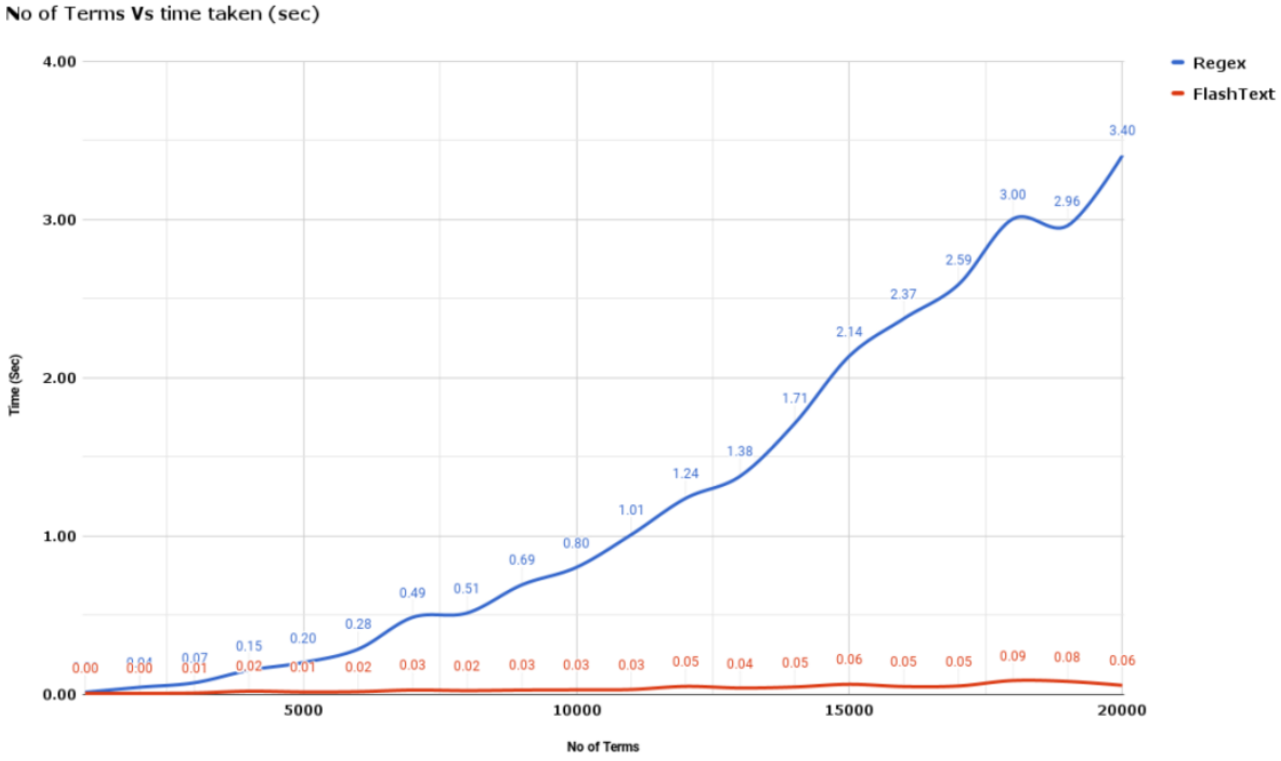

In [1]:
# 提取关键词
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 添加关键词
keyword_processor.add_keyword('Big Apple', 'New York')
keyword_processor.add_keyword('Bay Area')
# 3. 处理目标句子并提取相应关键词
keywords_found = keyword_processor.extract_keywords('I love Big Apple and Bay Area.')
# 4. 结果
print(keywords_found)

['New York', 'Bay Area']


其中 add_keyword 的第一个参数代表需要被查找的关键词，第二个参数是给这个关键词一个别名，如果找到了则以别名显示。

⭐常用:替换关键词

In [10]:
# 替换关键词 - 如果你想要替换关键词，只需要调用处理器的 replace_keywords 函数：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 添加关键词
keyword_processor.add_keyword('New Delhi', 'NCR region')
# 3. 替换关键词
new_sentence = keyword_processor.replace_keywords('I love Big Apple and new delhi.')
# 4. 结果
print(new_sentence)
print(type(new_sentence))

I love Big Apple and NCR region.
<class 'str'>


In [3]:
# 关键词大小写敏感 - 如果你需要精确提取，识别大小写字母，那么你可以在处理器初始化的时候设定 sensitive 参数:
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器, 注意设置大小写敏感(case_sensitive)为TRUE
keyword_processor = KeywordProcessor(case_sensitive=True)
# 2. 添加关键词
keyword_processor.add_keyword('Big Apple', 'New York')
keyword_processor.add_keyword('Bay Area')
# 3. 处理目标句子并提取相应关键词
keywords_found = keyword_processor.extract_keywords('I love big Apple and Bay Area.')
# 4. 结果
print(keywords_found)

['Bay Area']


In [4]:
# 标记关键词位置 - 如果你需要获取关键词在句子中的位置，在 extract_keywords 的时候添加 span_info=True 参数即可：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 添加关键词
keyword_processor.add_keyword('Big Apple', 'New York')
keyword_processor.add_keyword('Bay Area')
# 3. 处理目标句子并提取相应关键词, 并标记关键词的起始、终止位置
keywords_found = keyword_processor.extract_keywords('I love big Apple and Bay Area.', span_info=True)
# 4. 结果
print(keywords_found)

[('New York', 7, 16), ('Bay Area', 21, 29)]


In [8]:
# 获取目前所有的关键词-如果你需要获取当前已经添加的所有关键词，只需要调用处理器的 get_all_keywords 函数：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 添加关键词
keyword_processor.add_keyword('j2ee', 'Java')
keyword_processor.add_keyword('colour', 'color')
# 3. 获取所有关键词
keyword_processor.get_all_keywords()

{'j2ee': 'Java', 'colour': 'color'}

In [5]:
# 批量添加关键词 - 批量添加关键词有两种方法，一种是通过词典，一种是通过数组：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. （第一种）通过字典批量添加关键词
keyword_dict = {
    "java": ["java_2e", "java programing"],
    "product management": ["PM", "product manager"]
}
keyword_processor.add_keywords_from_dict(keyword_dict)
# 2. （第二种）通过数组批量添加关键词
keyword_processor.add_keywords_from_list(["java", "python"])
# 3. 第一种的提取效果如下
keyword_processor.extract_keywords('I am a product manager for a java_2e platform')

['product management', 'java']

In [6]:
# 单一或批量删除关键词 - 除关键词也非常简单，和添加类似：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 通过字典批量添加关键词
keyword_dict = {
    "java": ["java_2e", "java programing"],
    "product management": ["PM", "product manager"]
}
keyword_processor.add_keywords_from_dict(keyword_dict)
# 3. 提取效果如下
print(keyword_processor.extract_keywords('I am a product manager for a java_2e platform'))
# ['product management', 'java']
# 4. 单个删除关键词
keyword_processor.remove_keyword('java_2e')
# 5. 批量删除关键词，也是可以通过词典或者数组的形式
keyword_processor.remove_keywords_from_dict({"product management": ["PM"]})
keyword_processor.remove_keywords_from_list(["java programing"])
# 6. 删除了java programing关键词后的效果如下
keyword_processor.extract_keywords('I am a product manager for a java_2e platform')

['product management', 'java']


['product management']

⭐额外信息-可用于根据keyword抽取关系

In [7]:
# 支持额外信息-前面提到在添加关键词的时候第二个参数为其别名，其实你不仅可以指示别名，还可以将额外信息放到第二个参数中：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
kp = KeywordProcessor()
# 2. 添加关键词并附带额外信息
kp.add_keyword('Taj Mahal', ('Monument', 'Taj Mahal'))
kp.add_keyword('Delhi', ('Location', 'Delhi'))
# 3. 效果如下
kp.extract_keywords('Taj Mahal is in Delhi.')

[('Monument', 'Taj Mahal'), ('Location', 'Delhi')]

这样，在提取关键词的时候，你还能拿到其他一些你想要在得到此关键词时输出的信息

In [9]:
# 支持特殊单词边界 - Flashtext 检测的单词边界一般局限于 \w [A-Za-z0-9_] 外的任意字符，但是如果你想添加某些特殊字符作为单词的一部分也是可以实现的：
from flashtext import KeywordProcessor
# 1. 初始化关键字处理器
keyword_processor = KeywordProcessor()
# 2. 添加关键词
keyword_processor.add_keyword('Big Apple')
# 3. 正常效果
print(keyword_processor.extract_keywords('I love Big Apple/Bay Area.'))
# ['Big Apple']
# 4. 将 '/' 作为单词一部分
keyword_processor.add_non_word_boundary('/')
# 5. 优化后的效果
print(keyword_processor.extract_keywords('I love Big Apple/Bay Area.'))

['Big Apple']
[]
